## K-Nearest Neighbour 
- simplest machine learning algorithm based on Supervised Learning technique; 
- it can be used for Regression as well as for classification but mostly it is used for the classification problems;
- it is also called Lazy Learner Algorithm because it doesn't learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset

### K-NN Steps:
- Select the number 'K' of the neighbors
- Calculate the Euclidean distance of K number of neighbors
- Take the K nearest neighbors as per the calculated Euclidean distance
- Among these k neighbors, count the number of the data points in each category
- Assign the new data points to the category for which the number of the neighbor is maximum
- And thats the model

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
df['target'] = iris.target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]


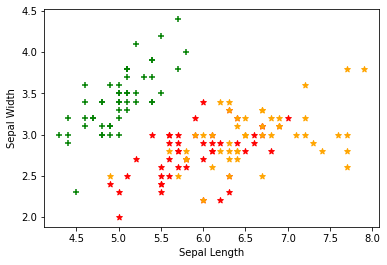

In [10]:
import matplotlib.pyplot as plt

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = "green", marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = "red", marker = '*')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color = "orange", marker = '*')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [17]:
X = df.drop(['target'], axis = 'columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9333333333333333

In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV
cross_val_score(KNeighborsClassifier(n_neighbors = 6), X, y, cv = 5).mean()

0.9800000000000001

In [35]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors' : range(1, 20)
}, cv = 5, return_train_score = False)
clf.fit(X, y)
clf.best_params_

{'n_neighbors': 6}

<AxesSubplot:>

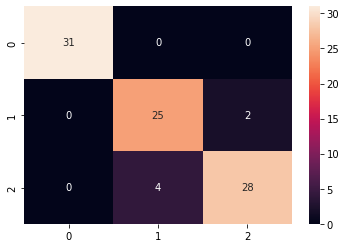

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, knn.predict(X_test))
sn.heatmap(cm, annot = True)